In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

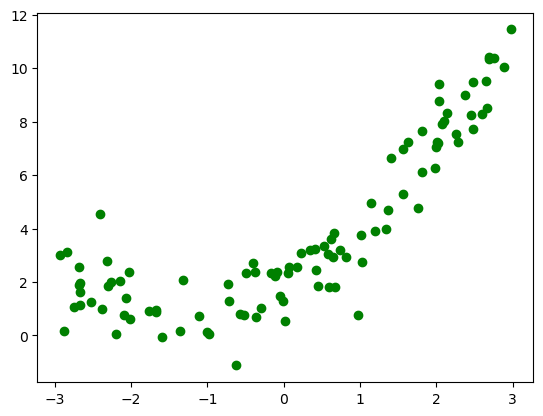

In [3]:
x = 6*np.random.rand(100,1) - 3
y = 0.5*x**2+1.5*x+2+np.random.randn(100,1)
plt.scatter(x,y,color='g')

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [6]:
# R^2
from sklearn.metrics import r2_score
score = r2_score(y_test,regression.predict(x_test))
score

0.4766828196399483

### Visualization

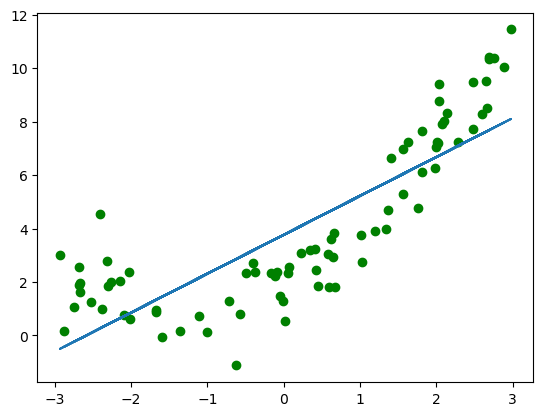

In [10]:
plt.scatter(x_train,y_train,color='g')
plt.plot(x_train,regression.predict(x_train))

## Lets apply polynomial transformation

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [17]:
x_train_poly

array([[ 1.00000000e+00, -2.66753512e+00,  7.11574361e+00],
       [ 1.00000000e+00, -1.68819734e-01,  2.85001026e-02],
       [ 1.00000000e+00, -2.66760000e+00,  7.11608975e+00],
       [ 1.00000000e+00, -2.01112429e+00,  4.04462090e+00],
       [ 1.00000000e+00,  1.19909893e+00,  1.43783825e+00],
       [ 1.00000000e+00,  2.68686359e+00,  7.21923596e+00],
       [ 1.00000000e+00,  2.66206235e+00,  7.08657596e+00],
       [ 1.00000000e+00, -2.40759251e+00,  5.79650167e+00],
       [ 1.00000000e+00,  2.04143334e+00,  4.16745010e+00],
       [ 1.00000000e+00,  2.01073537e+00,  4.04305671e+00],
       [ 1.00000000e+00,  1.62539469e+00,  2.64190790e+00],
       [ 1.00000000e+00, -2.88075593e+00,  8.29875473e+00],
       [ 1.00000000e+00,  6.76167649e-01,  4.57202689e-01],
       [ 1.00000000e+00,  6.52785926e-01,  4.26129465e-01],
       [ 1.00000000e+00, -9.00880837e-02,  8.11586282e-03],
       [ 1.00000000e+00, -4.68523899e-03,  2.19514644e-05],
       [ 1.00000000e+00, -2.37439149e+00

In [13]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train_poly,y_train)

LinearRegression()

In [14]:
# R^2
from sklearn.metrics import r2_score
score = r2_score(y_test,regression.predict(x_test_poly))
score

0.8604963233695266

In [18]:
print(regression.coef_)

[[0.         1.47499302 0.55094763]]


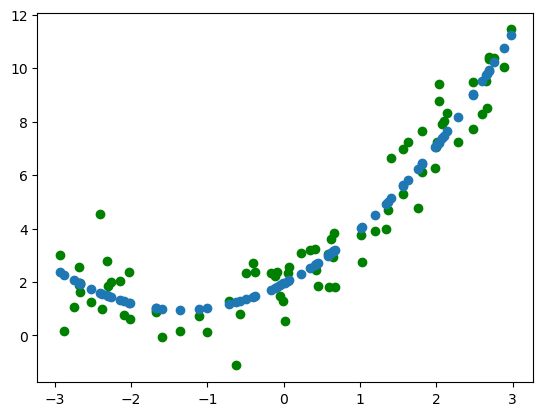

In [20]:
plt.scatter(x_train,y_train,color='g')
plt.scatter(x_train,regression.predict(x_train_poly))

#### when degree is 3

In [21]:
poly = PolynomialFeatures(degree=3,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [23]:
regression = LinearRegression()
regression.fit(x_train_poly,y_train)

LinearRegression()

In [24]:
score = r2_score(y_test,regression.predict(x_test_poly))
score

0.8594875809539089

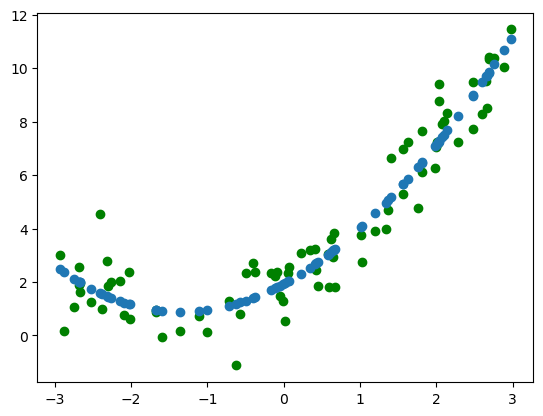

In [25]:
plt.scatter(x_train,y_train,color='g')
plt.scatter(x_train,regression.predict(x_train_poly))

##### degree 2 is working well

### Prediction of new data

In [27]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

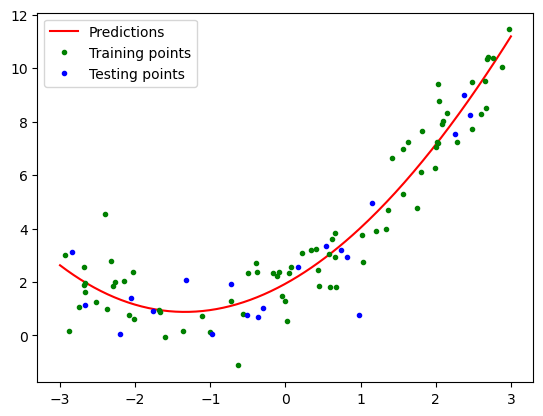

In [31]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new,y_new,"r-",label="Predictions")
plt.plot(x_train,y_train,"g.",label="Training points")
plt.plot(x_test,y_test,"b.",label="Testing points")
plt.legend()
plt.show()

# Pipeline concept

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
def poly_regression(degree) :
    x_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train)
    y_new_pred = poly_regression.predict(x_new)
    # plotting prediction line
    plt.plot(x_new,y_new_pred,"r-",label="predictions")
    plt.plot(x_train,y_train,"g.",label="train points")
    plt.plot(x_test,y_test,"b.",label="Testing points")
    plt.legend()
    plt.show()

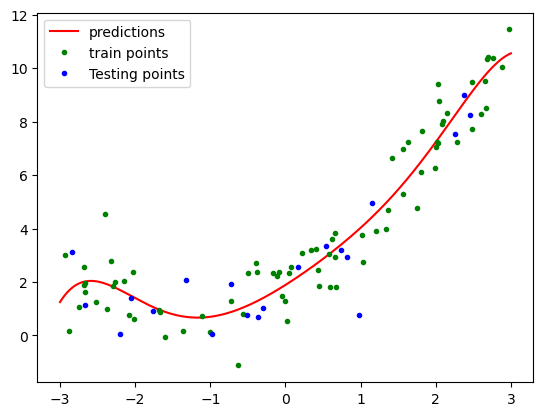

In [36]:
poly_regression(6)